In [1]:
from ranavision import *

In [2]:
# ======================================
# ============ MODELOS =================
# ======================================

# DEVICE
device = 'cuda'         # cuda o cpu ; cuda es gpu

# MODELO SEGMENTACION
weights = torchvision.models.segmentation.FCN_ResNet50_Weights.DEFAULT
preprocess = weights.transforms()
model_seg = torchvision.models.segmentation.fcn_resnet50(num_classes=2).to(device)
model_seg.load_state_dict(torch.load('ranavision_segmentation.pt', map_location=device))
model_seg = model_seg.eval()

# MODELO DETECCION
model_det = torchvision.models.detection.fasterrcnn_resnet50_fpn(num_classes=11).to(device)
model_det.load_state_dict(torch.load('ranavision_detection.pt', map_location=device))
model_det = model_det.eval()
pass


prediccion 111.46


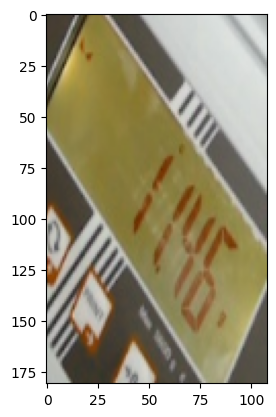

In [37]:
# DETECTAR UN NUMERO: Recibe una imagen y retorna un float
im = cv2.imread('imagenes de prueba/r42.png')
pantalla = getPantalla(im,model_seg,preprocess,device)          # segmentar la pantalla
pred = predictDigitos(pantalla,model_det,device,0.7)            # generar la prediccion
pred = formatDigitos(pred)                                      # formatearla para que se vea como float
print( 'prediccion', pred/100 )                                 # recorad dividir por 100
plt.imshow(pantalla)
plt.show()

In [ ]:

# COMPARAR IMAGEN CON NUMERO: 
# Recibe una imagen y un float y retorna un float con la confianza (si es que el numero es el mismo que la imagen)
# y un cero (0) si es que no se puede detectar el numero sea el mismo
im = cv2.imread('./imagenes de prueba/r42.png')
pantalla = getPantalla(im,model_seg,preprocess,device)          # segmentar la pantalla
pred = predictDigitos(pantalla,model_det,device,0.6)            # generar la prediccion

number2compare = 1146
iguales = compareDigitos(pred,number2compare,verbose=0)
print(iguales)
plt.imshow(pantalla)
plt.show()
